## Data Exploration with Spark

---

### Import Libraries

In [1]:
# import libraries
import findspark

# Locate the spark installation
findspark.init()

In [2]:
import pandas as pd
import pyspark as ps
from pyspark.sql.functions import col, sum
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

### Initialize Spark

In [3]:
# Initialize a SparkContext
sc = ps.SparkContext(appName="prior_analysis")

23/08/31 16:12:52 WARN Utils: Your hostname, MacBook-Pro-di-Andrea.local resolves to a loopback address: 127.0.0.1; using 192.168.1.129 instead (on interface en0)
23/08/31 16:12:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/31 16:12:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Connect and import data from HDFS directly into a Spark DataFrame

In [4]:
# Initialize the Session
spark_session = ps.sql.SparkSession(sc)

# Define schema for better manipulation

data_schema = StructType([
    StructField("Title", StringType(), True),
    StructField("description", StringType(), True),
    StructField("authors", StringType(), True),
    StructField("image", StringType(), True),
    StructField("previewLink", StringType(), True),
    StructField("publisher", StringType(), True),
    StructField("publishedDate", StringType(), True),
    StructField("infoLink", StringType(), True),
    StructField("categories", StringType(), True),
    StructField("ratingsCount", FloatType(), True)
])

ratings_schema = StructType([
    StructField("Id", IntegerType(), True),
    StructField("Title", StringType(), True),
    StructField("Price", FloatType(), True),
    StructField("User_id", IntegerType(), True),
    StructField("profileName", StringType(), True),
    StructField("review/helpfulness", StringType(), True),
    StructField("review/score", FloatType(), True),
    StructField("review/time", IntegerType(), True),
    StructField("review/summary", StringType(), True),
    StructField("review/text", StringType(), True)
])


# Load the data
# name = 'davideligari'
name = 'andreaalberti'
df_data = spark_session.read.option('escape','"').csv('hdfs://localhost:9900/user/'+name+'/book_reviews/books_data.csv', header=True, schema=data_schema)
df_ratings = spark_session.read.option('escape','"').csv('hdfs://localhost:9900/user/'+name+'/book_reviews/books_rating.csv', header=True, schema=ratings_schema)

### Data Exploration

- Show the first 5 rows of the data
- Investigate the inferred schema of the data
- Discover data dimensionality
- Show some statistics
- Discover null values
- Discover the number of distinct values in each column

In [5]:
# Show the data
print('Data Table: \n')
df_data.limit(5).toPandas()

Data Table: 



,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",None,['Edward Long'],None,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,NaN


In [6]:
print('Ratings Table: \n')
df_ratings.limit(5).toPandas()

Ratings Table: 



,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,NaN,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,826414346,Dr. Seuss: American Icon,NaN,NaN,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,826414346,Dr. Seuss: American Icon,NaN,NaN,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,826414346,Dr. Seuss: American Icon,NaN,NaN,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,826414346,Dr. Seuss: American Icon,NaN,NaN,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [7]:
#Investigate the schema
print('Data Table Schema: \n')
df_data.printSchema()

print('Ratings Table Schema: \n')
df_ratings.printSchema()

Data Table Schema: 

root
 |-- Title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- image: string (nullable = true)
 |-- previewLink: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- publishedDate: string (nullable = true)
 |-- infoLink: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- ratingsCount: float (nullable = true)

Ratings Table Schema: 

root
 |-- Id: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- User_id: integer (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: float (nullable = true)
 |-- review/time: integer (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)



In [8]:
# Check dimensionality
print(f'Data Table Dimensionality: {df_data.count(), len(df_data.columns)}')
print(f'Ratings Table Dimensionality: {df_ratings.count(), len(df_ratings.columns)}')

# Statistical summary
print('Data Table Summary: \n')
df_data.describe().show()

print('Ratings Table Summary: \n')
df_ratings.describe().show()

Data Table Dimensionality: (212404, 10)


Ratings Table Dimensionality: (3000000, 10)
Data Table Summary: 



23/08/31 16:12:59 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|summary|               Title|         description|             authors|               image|         previewLink|           publisher|     publishedDate|            infoLink|          categories|      ratingsCount|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|  count|              212403|              143962|              180991|              160329|              188568|              136518|            187099|              188568|              171205|             49752|
|   mean|   3823.672941176471|  1.4285714285714286|                null|                null|                null|             51495.0|1

+-------+-------------------+--------------------+------------------+-------+-----------+------------------+-----------------+-------------------+--------------------+--------------------+
|summary|                 Id|               Title|             Price|User_id|profileName|review/helpfulness|     review/score|        review/time|      review/summary|         review/text|
+-------+-------------------+--------------------+------------------+-------+-----------+------------------+-----------------+-------------------+--------------------+--------------------+
|  count|            1280981|             2999792|            481171|      0|    2438114|           3000000|          3000000|            3000000|             2999962|             2999992|
|   mean|8.750887636698718E8|   2012.796651763537|21.762655893432562|   null|        NaN|              null|4.215289333333334|1.132306772630393E9|            Infinity|             17963.0|
| stddev|5.161812590603045E8|  1536.7533549608797|26.20

In [9]:
import numpy as np

# Check for number of distinct values for each column in %
n_distinct_list = []

for c in df_data.columns:
    n_distinct = df_data.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_data_pandas = pd.DataFrame(index = df_data.columns, columns = ['N. Distinct Values'], data = (np.array((n_distinct_list))/df_data.count())*100)

n_distinct_list = []

for c in df_ratings.columns:
    n_distinct = df_ratings.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_ratings_pandas = pd.DataFrame(index = df_ratings.columns, columns = ['N. Distinct Values'], data = (np.array((n_distinct_list))/df_ratings.count())*100)

Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=34527Kb max_used=34536Kb free=96544Kb
 bounds [0x000000010a1d8000, 0x000000010c3d8000, 0x00000001121d8000]
 total_blobs=12938 nmethods=11947 adapters=904
 compilation: disabled (not enough contiguous free space left)


In [10]:
from pyspark.sql.functions import col, count, when

# Check for missing values
df_data_pandas_tmp = df_data.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_data.columns]).toPandas()
# Add to the pandas summary dataframe
df_data_pandas['N. Missing Values'] = (df_data_pandas_tmp.loc[0, :]/df_data.count()*100).tolist()

# Check for missing values
df_ratings_pandas_tmp = df_ratings.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_ratings.columns]).toPandas()
# Add to the pandas summary dataframe
df_ratings_pandas['N. Missing Values'] = (df_ratings_pandas_tmp.loc[0, :]/df_ratings.count()*100).tolist()

In [13]:
df_data_pandas

,N. Distinct Values,N. Missing Values
Title,100.000000,0.000471
description,62.723395,32.222557
authors,59.923071,14.789270
image,70.332009,24.516958
previewLink,88.557654,11.222011
publisher,7.540818,35.727199
publishedDate,5.453287,11.913617
infoLink,86.866067,11.222011
categories,5.124197,19.396527
ratingsCount,0.225514,76.576712


In [15]:
df_ratings_pandas

,N. Distinct Values,N. Missing Values
Id,4.197100,57.300633
Title,7.080133,0.006933
Price,0.200167,83.960967
User_id,0.000033,100.000000
profileName,28.471567,18.729533
review/helpfulness,0.402800,0.000000
review/score,0.000167,0.000000
review/time,0.209067,0.000000
review/summary,53.077200,0.001267
review/text,68.754967,0.000267


<AxesSubplot: title={'center': 'Ratings Table Summary'}, ylabel='Percentage'>

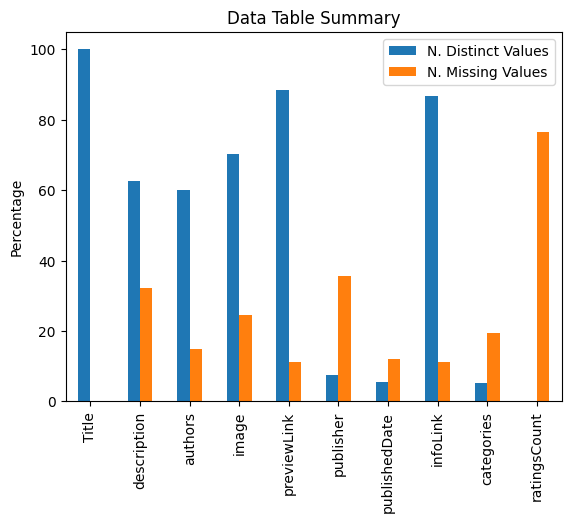

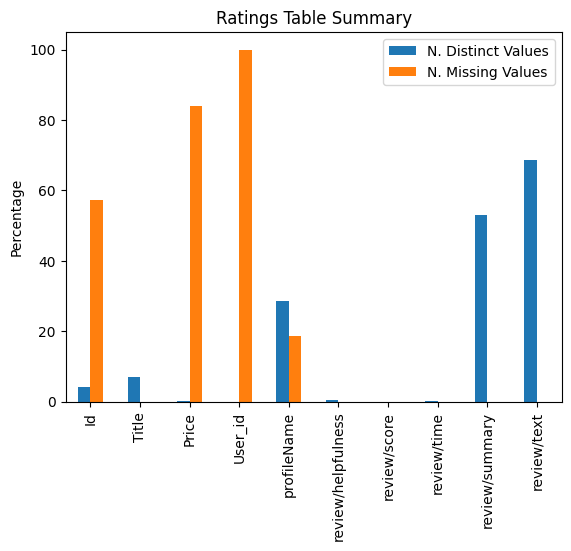

In [14]:
#df_data_pandas.set_index('Column', inplace=True)
df_data_pandas.plot(title='Data Table Summary', kind='bar', ylabel='Percentage')

#df_ratings_pandas.set_index('Column', inplace=True)
df_ratings_pandas.plot(title='Ratings Table Summary', kind='bar', ylabel='Percentage')

## Data Cleaning
---

### - Data Table

| Column            | Description                                                 |
| ----------------- | ----------------------------------------------------------- |
| **Title**         | Book title                                                  |
| **description**   | Description of the book                                     |
| **authors**       | Name of book authors                                        |
| **image**         | URL for book cover                                          |
| **previewLink**   | Link to access this book on Google Books                    |
| **publisher**     | Name of the publisher                                       |
| **publishedDate** | The date of publish                                         |
| **infoLink**      | Link to get more information about the book on Google Books |
| **categories**    | Genres of books                                             |
| **ratingsCount**  | Number of ratings and reviews for the book                  |

### - Ratings Table

| Column                 | Description                                 |
| ---------------------- | ------------------------------------------- |
| **Id**                 | The ID of the book                          |
| **Title**              | The title of the book                       |
| **Price**              | The price of the book                       |
| **User_id**            | The ID of the user who rated the book       |
| **profileName**        | The name of the user who rated the book     |
| **review/helpfulness** | Helpfulness rating of the review (e.g. 2/3) |
| **review/score**       | Rating from 0 to 5 for the book             |
| **review/time**        | Time the review was given                   |
| **review/summary**     | The summary of the text review              |
| **review/text**        | The full text of the review                 |




### Handle missing values

1. **_Hypothesis_**: Reviews with longer text have higher helpfulness ratings.

- **Missing Values**:
    - `review/text`: set missing values as empty string
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `review/text`: ...
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

2. **_Hypothesis_**: Reviews with more positive sentiment words receive higher helpfulness ratings.

- **Missing Values**:
    - `review/text`: remove the entire sample
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `review/text`: Assign 1 to score (4, 5), 0 to score (1, 2). Create the BoW for the text. Fit a MNBC and count the number of positive and negative words. Graphical Plot.
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

3. **_Hypothesis_**: Reviews with higher average book ratings have higher helpfulness ratings.

- **Missing Values**:
    - `review/score`: remove the entire sample
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `review/score`: groupBy book title and calculate the average score.
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

4. **_Hypothesis_**: Reviews with more descriptive summaries are perceived as more helpful.

- **Missing Values**:
    - `review/summary`: set missing values as empty string
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `review/summary`: ...
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

5. **_Hypothesis_**: Reviews written by users with a history of providing helpful reviews receive higher helpfulness ratings.

- **Missing Values**:
    - `profileName`: Make a separate group for 'Anonymous' users.
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `profileName`: Transform the helpfulness. GroupBy profileName and average the helpfulness of the reviews.
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$

6. **Hytpothesis**: There is a relationship between the number of reviews of a specific user and the helpfulness of his reviews.

- **Missing Values**:
    - `profileName`: Make a separate group for 'Anonymous' users.
    - `review/helpfulness`: remove the entire sample

- **Data Transformation**:
    - `profileName`: GroupBy profileName and count the reviews.
    - `review/helpfulness`: $helpfulness = \frac{x}{y} \sqrt(y)$


In [ ]:
# Fill missing values in ratings DataFrame with default values
ratings_df = ratings_df.fillna({"Price": 0.0, "review/score": 0.0})

# Fill missing values in info DataFrame with default values
info_df = info_df.fillna({"authors": "Unknown", "categories": "Unknown"})

### Join the two tables on the **TITLE** column

In [ ]:
# Perform the join operation on the Title column
joined_df = ratings_df.join(info_df, on="Title", how="inner")

# Select desired columns from the joined DataFrame
selected_columns = [
    "Title", "Price", "User_id", "profileName",
    "review/helpfulness", "review/score",
    "authors", "categories"
]
result_df = joined_df.select(selected_columns)

# Show the resulting DataFrame
result_df.show()

In [12]:
# Stop the SparkContext
sc.stop()